# Applied Machine Learning Homework 2 Question 1 


### In this project we are going to apply different classification methods such 
1. **Multinomial Logistic Regression (Softmax Regression)**
2. **Support Vector Machine**
3. **Random Forest classifier**
And combine the best hyperparameters of these classifiers into an Ensemble model

### Dataset Used
#### aggregateRockData.xlsx - Contains the categorization and recognition data from the test phase of the experiment, aggregated by rock token. This data served as the primary target for formal modeling efforts


#### feature_presence540.txt - Each row corresponds to one rock stimulus. Contains mean feature presence ratings for each of the 540 rock stimuli.

# Q1)Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

labels = pd.read_excel("aggregateRockData.xlsx",header=None)[1]
features = pd.read_csv("feature_presence540.txt", delim_whitespace=True, usecols=range(1,14),header=None)

In [2]:
features.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13
11,1,12,0.50,0.15,0.00,0.00,0.05,0.00,0.0,0.20,0.0,0.0,0.25
266,17,11,0.00,0.00,0.10,0.00,0.40,0.05,0.5,0.10,0.0,0.0,0.05
461,29,14,0.00,0.00,0.00,0.00,0.20,0.05,0.0,0.00,0.0,0.0,0.90
7,1,8,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.20,0.0,0.0,0.20
504,13,17,0.00,0.00,0.35,0.10,0.00,0.00,0.0,0.30,0.0,0.0,0.05
246,16,7,0.00,0.00,0.10,0.95,0.05,0.00,0.0,0.00,0.0,0.0,0.10
32,3,1,0.00,0.05,0.00,0.00,0.05,0.00,0.1,0.35,0.0,0.0,0.05
467,30,4,0.00,0.00,0.00,0.00,0.70,0.00,0.0,0.00,0.0,0.0,0.15
204,13,13,0.00,0.00,0.60,0.40,0.00,0.00,0.0,0.05,0.0,0.0,0.25
507,14,18,0.00,0.00,0.05,0.00,0.10,0.05,0.0,0.15,0.0,0.0,0.10


In [3]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [4]:
combined_data = pd.concat([labels, features], axis=1)

temp_df = combined_data
temp_df.head()

,1,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1.0,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1.0,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1.0,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1.0,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [5]:
df = temp_df.iloc[:480]
len(df)

480

In [6]:
column_names = [
"Rock category number",
"Subtype number",
"Token number",
"Angular fragments",
"Rounded fragments",
"Straight stripes",
"Curved stripes",
"Physical layers",
"Veins",
"Oily/shimmery texture",
"Splotchy texture",
"Single translucent crystal",
"Multiple cubic crystals",
"Sandy texture",
]
df.columns=column_names
# df.head()
df.sample(10)

,Rock category number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
53,1.0,4,6,0.00,0.00,0.00,0.00,0.05,0.05,0.05,0.60,0.0,0.05,0.15
311,2.0,20,8,0.00,0.00,0.00,0.00,0.70,0.00,0.05,0.00,0.0,0.00,0.05
457,3.0,29,10,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.10,0.0,0.00,0.90
351,3.0,22,16,0.35,0.20,0.00,0.00,0.35,0.00,0.00,0.05,0.0,0.00,0.10
93,1.0,6,14,0.00,0.00,0.00,0.00,0.10,0.10,0.75,0.00,0.0,0.00,0.00
346,3.0,22,11,1.00,0.05,0.00,0.00,0.00,0.00,0.05,0.05,0.0,0.00,0.00
255,2.0,16,16,0.00,0.00,0.00,0.95,0.10,0.05,0.00,0.05,0.0,0.00,0.00
159,1.0,10,16,0.15,0.15,0.00,0.00,0.15,0.00,0.00,0.05,0.0,0.00,0.45
245,2.0,16,6,0.00,0.00,0.00,0.90,0.00,0.05,0.05,0.05,0.0,0.00,0.05
290,2.0,19,3,0.15,0.05,0.00,0.00,0.05,0.00,0.45,0.30,0.0,0.00,0.10


In [7]:
df.shape

(480, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock category number        480 non-null    float64
 1   Subtype number              480 non-null    object 
 2   Token number                480 non-null    object 
 3   Angular fragments           480 non-null    object 
 4   Rounded fragments           480 non-null    object 
 5   Straight stripes            480 non-null    object 
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               480 non

#### Columns like Subtype number, Angular fragments, Rounded fragments, and Straight stripes are of type object, indicating they may need special treatment. Hence they are converted into numerical data type below

In [ ]:
df['Angular fragments'] = pd.to_numeric(df['Angular fragments'], errors='coerce')
df['Rounded fragments'] = pd.to_numeric(df['Rounded fragments'], errors='coerce')
df['Straight stripes'] = pd.to_numeric(df['Straight stripes'], errors='coerce')
df['Subtype number'] = pd.to_numeric(df['Straight stripes'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock category number        480 non-null    float64
 1   Subtype number              480 non-null    float64
 2   Token number                480 non-null    object 
 3   Angular fragments           480 non-null    float64
 4   Rounded fragments           480 non-null    float64
 5   Straight stripes            480 non-null    float64
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               480 non

In [11]:
df.describe()

,Rock category number,Subtype number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.067729,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,0.194792,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


#### df.describe() is used to display the summary statistics (mean, standard deviation, min, max, etc.) . It is necessary for understanding data distribution and detecting potential issues.

In [12]:
df.isnull().sum()

Rock category number          0
Subtype number                0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
dtype: int64

#### Here above, we observe that  there are no missing values in any of the columns. This means we do not need to handle missing data, which simplifies the preprocessing step. 

In [13]:
df['Token number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'], dtype=object)

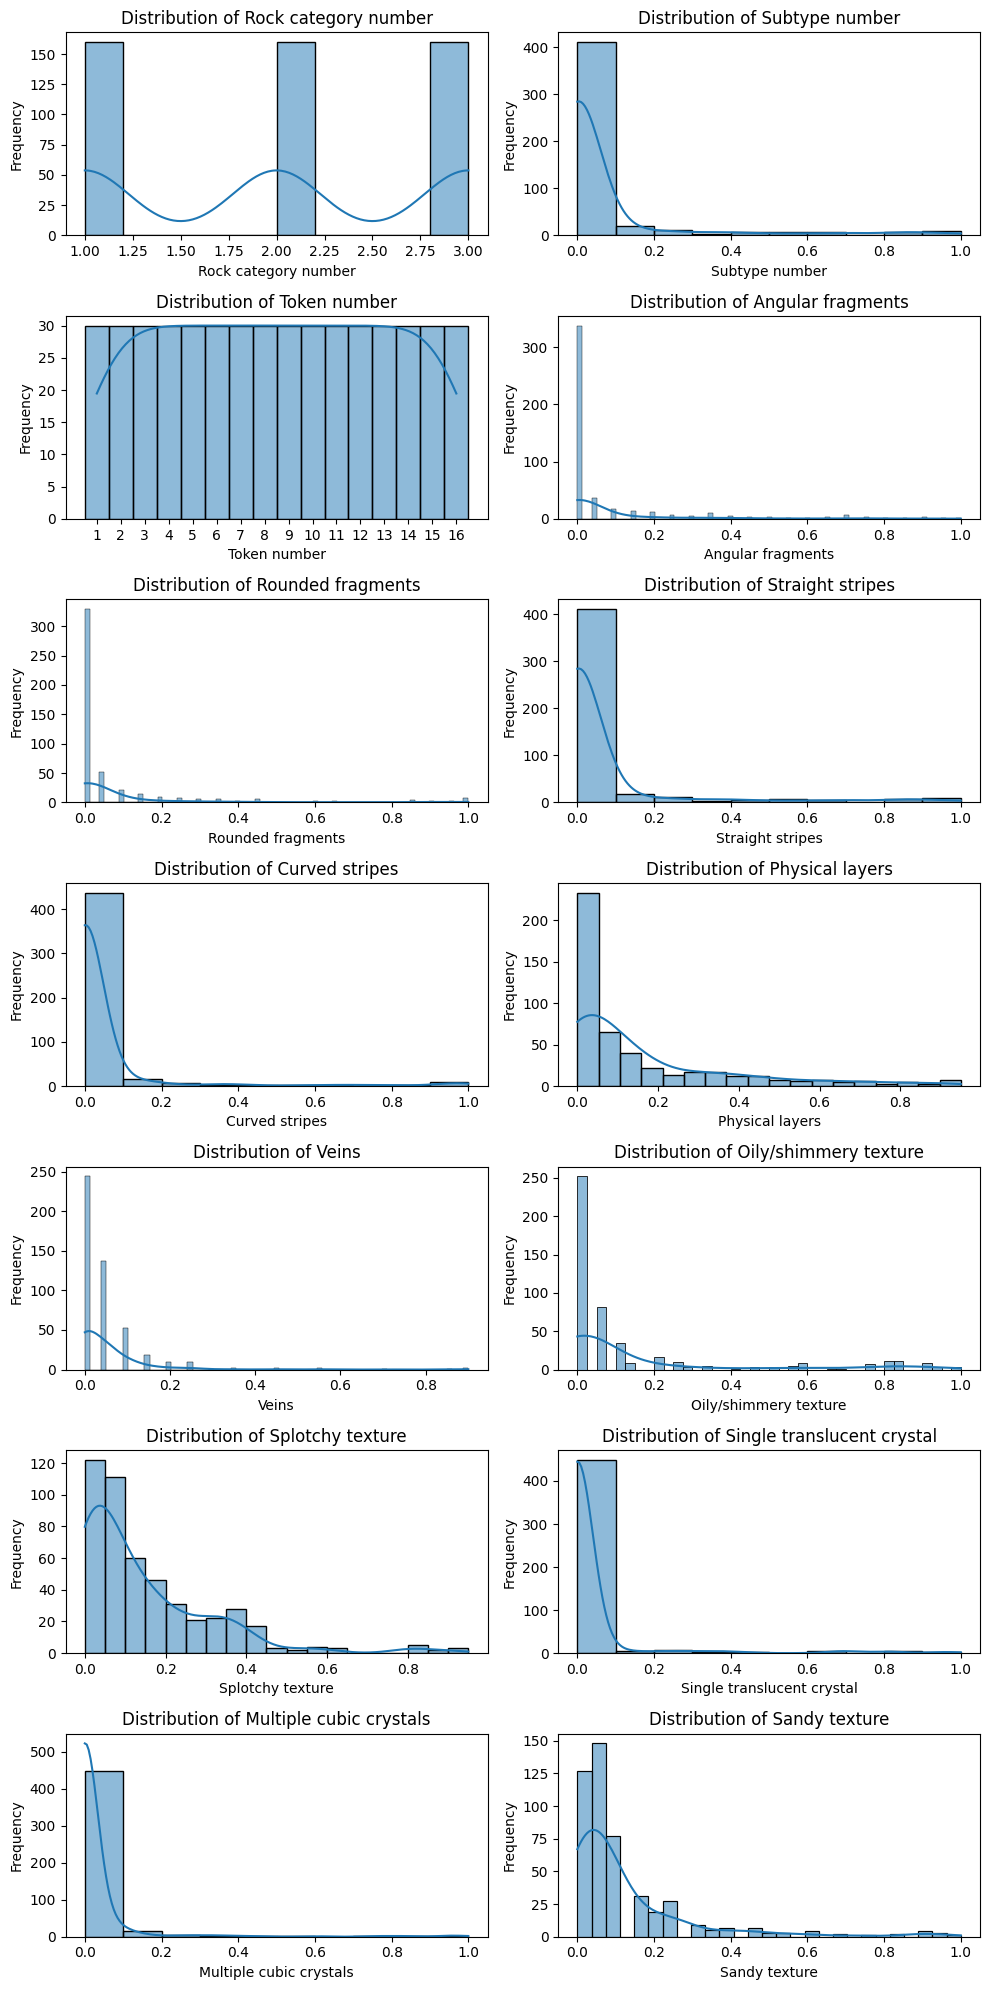

In [14]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns):
    plt.subplot(7, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### The histograms above display the distribution of each attribute .These plots allow us to visually inspect for skewness, outliers, and the general distribution of each feature.

### Statistical Summary of the Rock Dataset

The statistical summary of our dataset provides valuable insights into the distribution and characteristics of each feature related to the rocks, as well as their categories. Below is an analysis of each column:

#### 1. Rock Category Number
- **Mean**: The average rock category number is 2.0, which suggests that the dataset is evenly balanced between Igneous (1), Metamorphic (2), and Sedimentary (3) rocks.
- **Standard Deviation**: The standard deviation of 0.82 indicates a moderate spread around the mean, confirming the presence of all three categories.
- **Min/Max**: The minimum value is 1 (Igneous) and the maximum value is 3 (Sedimentary), with no missing values.

#### 2. Subtype Number
- **Mean**: The mean subtype number is approximately 0.068, suggesting that most subtypes occur infrequently, as this value is close to zero.
- **Standard Deviation**: The standard deviation of 0.195 indicates variability among the subtype occurrences.
- **Min/Max**: The minimum value is 0, and the maximum value is 1, implying that subtypes are either absent or present.

#### 3. Angular Fragments
- **Mean**: The average is 0.084, indicating that angular fragments are present in a small proportion of the samples.
- **Standard Deviation**: With a standard deviation of 0.194, there is considerable variability in the presence of angular fragments.
- **Min/Max**: The values range from 0 (absence) to 1 (presence), showing a binary nature of this feature.

#### 4. Rounded Fragments
- **Mean**: The mean value is 0.080, reflecting that rounded fragments are also present in low proportions.
- **Standard Deviation**: The standard deviation of 0.198 suggests diverse occurrences of this feature across samples.
- **Min/Max**: The feature shows a range from 0 to 1, indicating its binary characteristic.

#### 5. Straight Stripes
- **Mean**: An average of 0.068 indicates a low occurrence of straight stripes.
- **Standard Deviation**: A standard deviation of 0.195 suggests variability among rock samples regarding this feature.
- **Min/Max**: Values span from 0 to 1, showing the presence or absence of straight stripes.

#### 6. Curved Stripes
- **Mean**: The average presence of curved stripes is 0.042, again indicating low overall occurrence.
- **Standard Deviation**: With a standard deviation of 0.161, variability in this feature is noted.
- **Min/Max**: The values are between 0 and 1, indicating this feature's binary nature.

#### 7. Physical Layers
- **Mean**: An average of 0.165 shows a moderate occurrence of physical layers in the rock samples.
- **Standard Deviation**: The standard deviation of 0.217 indicates some variability.
- **Min/Max**: The range from 0 to 0.950 shows that physical layers are commonly present.

#### 8. Veins
- **Mean**: The mean value of 0.052 indicates low presence of veins.
- **Standard Deviation**: A standard deviation of 0.103 signifies some variability in occurrences.
- **Min/Max**: Ranges from 0 to 0.900, indicating that veins can be present to varying extents.

#### 9. Oily/Shimmery Texture
- **Mean**: An average of 0.144 suggests a moderate occurrence.
- **Standard Deviation**: The standard deviation of 0.266 indicates variability.
- **Min/Max**: Ranges from 0 to 1, suggesting presence in some samples.

#### 10. Splotchy Texture
- **Mean**: The mean of 0.141 indicates a moderate level of splotchy texture in rocks.
- **Standard Deviation**: A standard deviation of 0.168 shows variability in occurrence.
- **Min/Max**: From 0 to 0.950, indicating a range of presence.

#### 11. Single Translucent Crystal
- **Mean**: An average of 0.032 indicates low occurrence.
- **Standard Deviation**: A standard deviation of 0.136 suggests variability in the presence of this feature.
- **Min/Max**: Ranges from 0 to 1, indicating binary presence.

#### 12. Multiple Cubic Crystals
- **Mean**: The mean of 0.025 suggests infrequent presence.
- **Standard Deviation**: A standard deviation of 0.112 shows variability.
- **Min/Max**: From 0 to 1, reflecting binary characteristics.

#### 13. Sandy Texture
- **Mean**: An average of 0.120 suggests a moderate presence of sandy texture.
- **Standard Deviation**: With a standard deviation of 0.173, variability is observed.
- **Min/Max**: The range is from 0 to 1, indicating presence in certain samples.


### Histograms of Rock Features

Histograms provide a visual representation of the distribution of numerical data, helping us understand the underlying frequency of each feature in the rock dataset. Above are histograms for each relevant feature.

# Q2) Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots

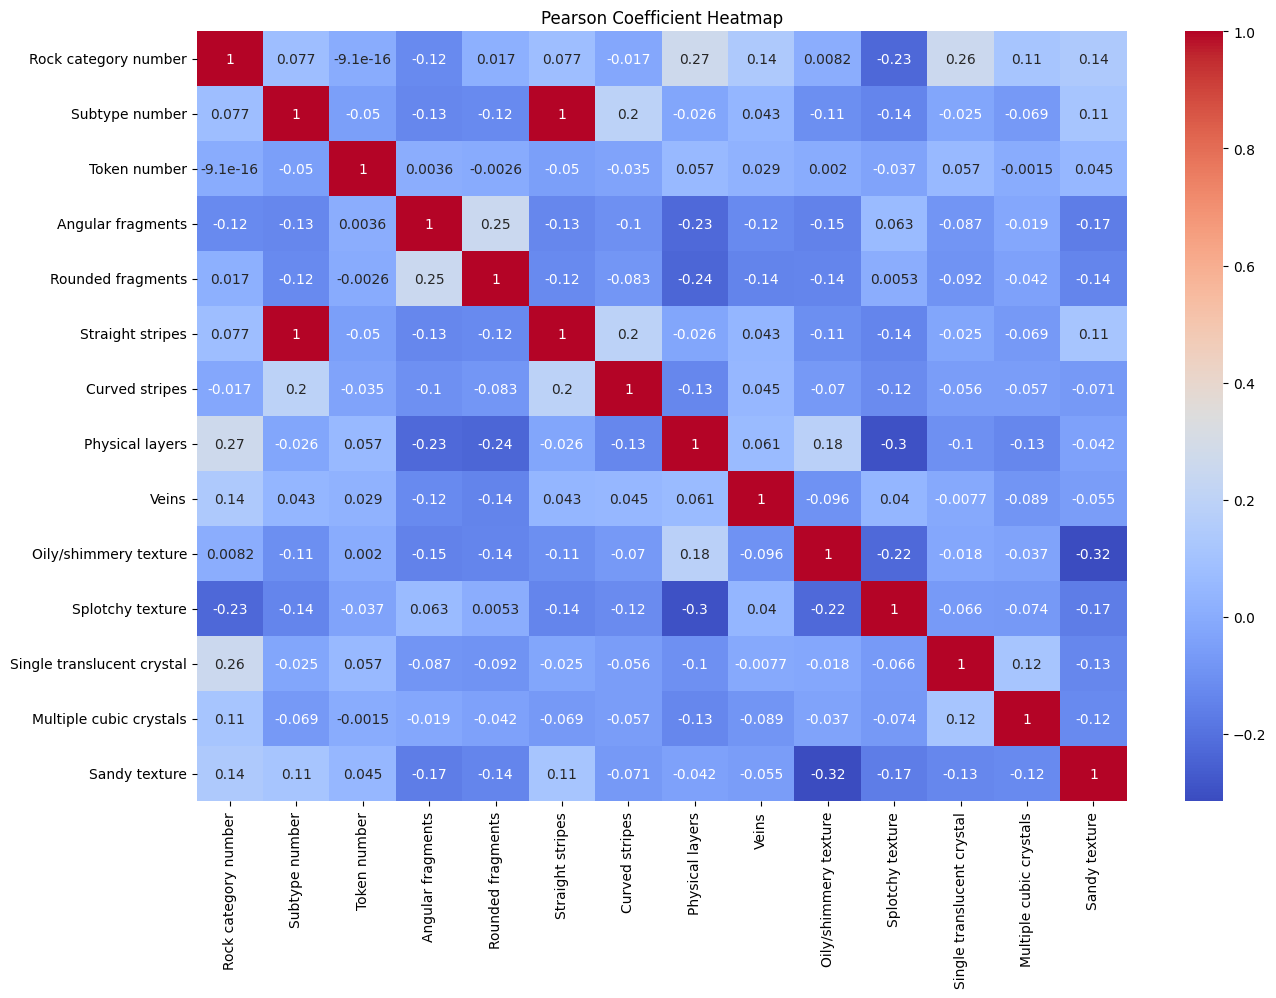

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot = True, cmap= 'coolwarm' )
plt.title('Pearson Coefficient Heatmap')
plt.show()

In [16]:
df.corr(method='pearson', numeric_only=True)

,Rock category number,Subtype number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
Rock category number,1.000000,0.077495,-0.122447,0.017446,0.077495,-0.017454,0.266699,0.140553,0.008172,-0.229273,0.258910,0.113872,0.139845
Subtype number,0.077495,1.000000,-0.133497,-0.123095,1.000000,0.196752,-0.026329,0.042965,-0.105445,-0.135787,-0.025440,-0.069152,0.112303
Angular fragments,-0.122447,-0.133497,1.000000,0.250326,-0.133497,-0.103118,-0.225362,-0.123902,-0.150316,0.063420,-0.087195,-0.018756,-0.165639
Rounded fragments,0.017446,-0.123095,0.250326,1.000000,-0.123095,-0.083384,-0.235652,-0.141425,-0.140435,0.005265,-0.092404,-0.041817,-0.136152
Straight stripes,0.077495,1.000000,-0.133497,-0.123095,1.000000,0.196752,-0.026329,0.042965,-0.105445,-0.135787,-0.025440,-0.069152,0.112303
Curved stripes,-0.017454,0.196752,-0.103118,-0.083384,0.196752,1.000000,-0.134700,0.045330,-0.070313,-0.116348,-0.056443,-0.056908,-0.071011
Physical layers,0.266699,-0.026329,-0.225362,-0.235652,-0.026329,-0.134700,1.000000,0.061391,0.184191,-0.295079,-0.102496,-0.131038,-0.041839
Veins,0.140553,0.042965,-0.123902,-0.141425,0.042965,0.045330,0.061391,1.000000,-0.095940,0.040470,-0.007707,-0.089083,-0.054820
Oily/shimmery texture,0.008172,-0.105445,-0.150316,-0.140435,-0.105445,-0.070313,0.184191,-0.095940,1.000000,-0.224798,-0.018165,-0.037376,-0.315414
Splotchy texture,-0.229273,-0.135787,0.063420,0.005265,-0.135787,-0.116348,-0.295079,0.040470,-0.224798,1.000000,-0.065659,-0.073539,-0.166148


### Explanation of the Pearson Correlation Coefficient (PCC) Matrix

The Pearson Correlation Coefficient (PCC) matrix provides insight into the relationships between various features of rocks in the dataset. The values range from -1 to 1, where:
- **1** indicates a perfect positive linear relationship,
- **-1** indicates a perfect negative linear relationship, and
- **0** indicates no linear relationship.

#### Relationships Between Data Attributes

1. Cohesive Patterns
Certain attributes, such as **"Straight stripes"** and **"Subtype number,"** show a perfect correlation (1.0). This suggests that these attributes may be closely linked or could represent similar characteristics of the rocks.

2. Texture Associations
The attributes related to texture, including **"Oily/shimmery texture,"** **"Splotchy texture,"** and **"Sandy texture,"** exhibit complex interrelations. For instance:

    - **"Sandy texture"** shows a negative correlation with **"Splotchy texture"** (-0.17).
    - It also has a strong negative correlation with **"Oily/shimmery texture"** (-0.32).

These correlations suggest that rocks with a sandy texture tend to lack oily or splotchy features.


#### Relationships Between Attributes and Labels

1. **Physical Layers and Rock Category Number (0.27)**:
   - There is a strong positive correlation, indicating that rocks with more pronounced physical layers tend to belong to specific categories. This suggests that the formation processes that create these layers are characteristic of certain rock types, such as sedimentary rocks.

2. **Straight Stripes and Subtype Number (1.00)**:
   - The perfect correlation shows that straight stripes are a defining feature of subtypes within the rock category. This indicates that all subtypes exhibit this characteristic, making it crucial for accurate classification.

3. **Oily/Shimmery Texture and Subtype Number (-0.10)**:
   - This weak negative correlation implies that rocks with oily or shimmery textures are less likely to belong to certain subtypes. This suggests that these textures might be more prevalent in other categories or types of rocks, aiding in differentiation during classification.


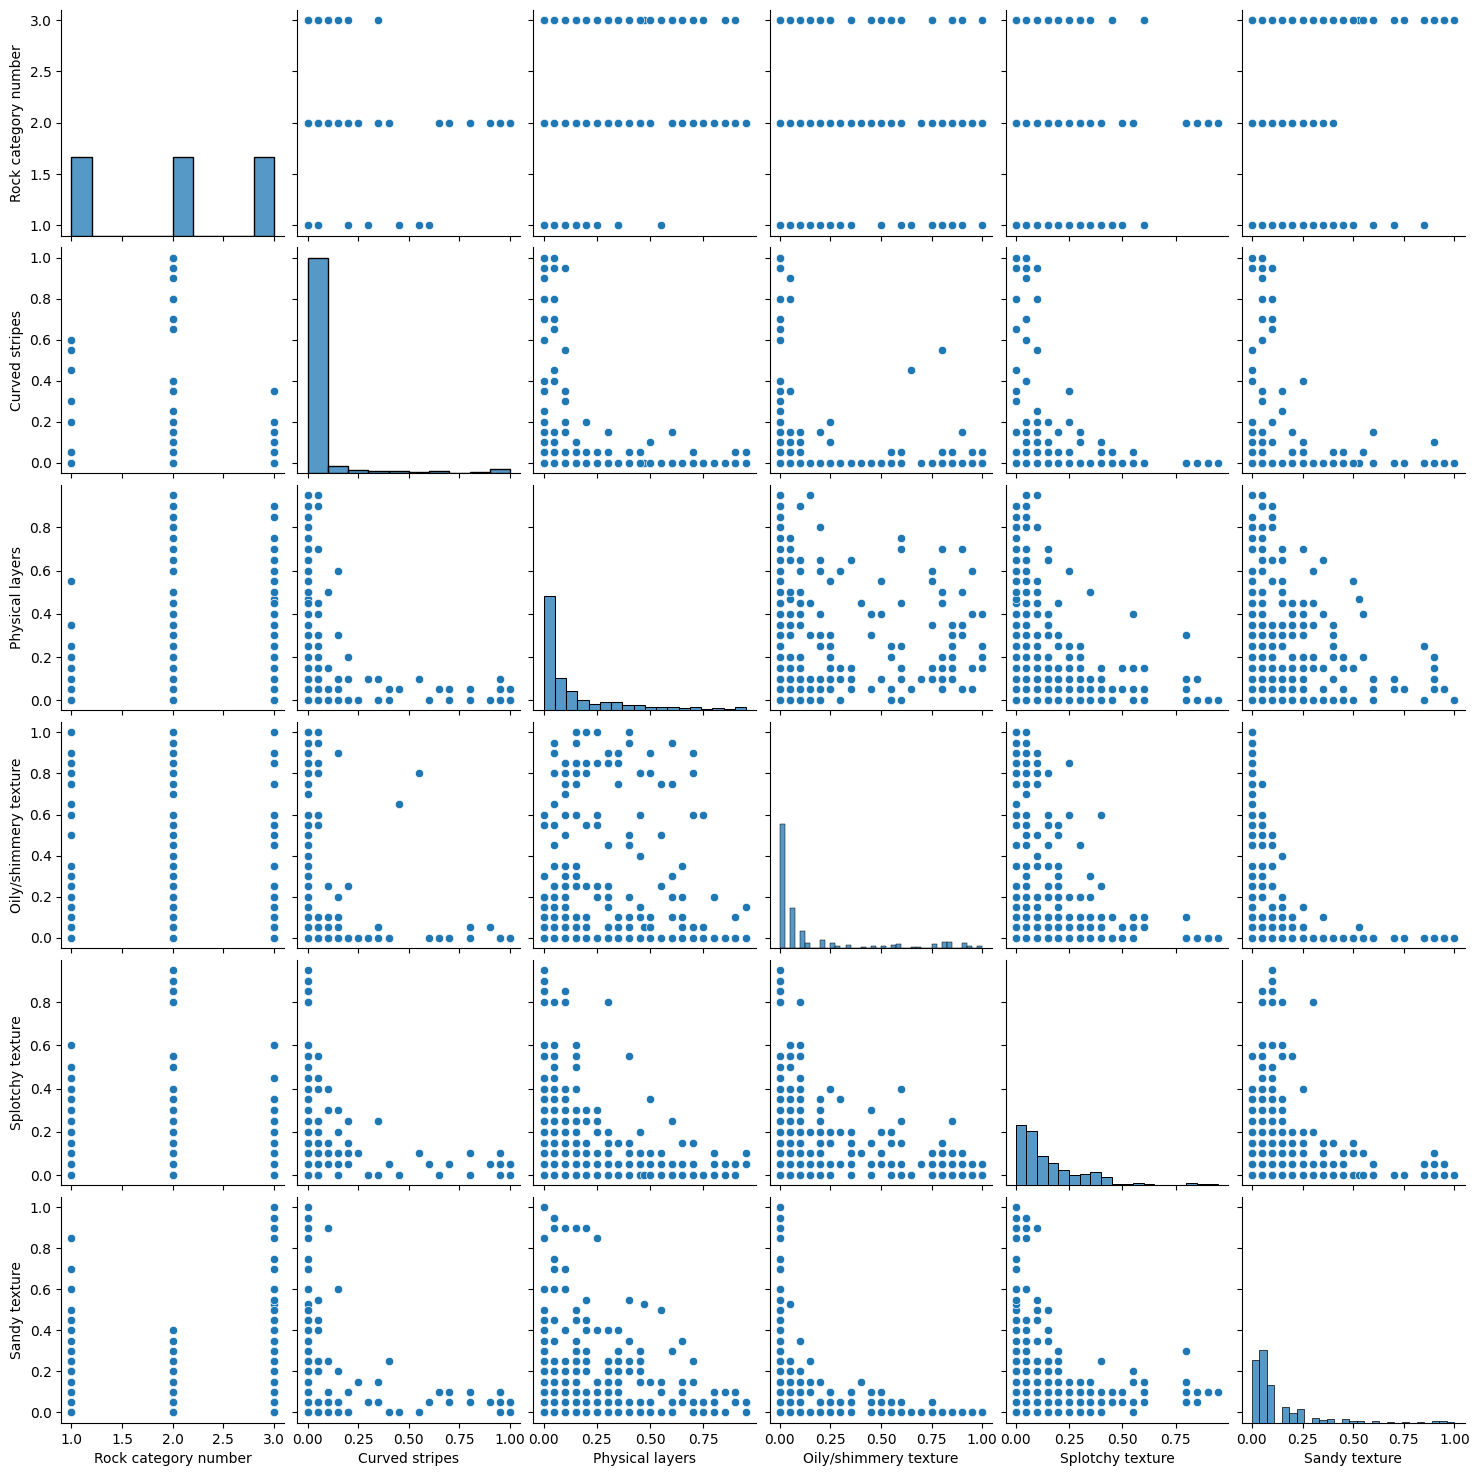

In [17]:
sns.pairplot(df[[
    "Rock category number", "Curved stripes", "Physical layers","Oily/shimmery texture", "Splotchy texture", "Sandy texture"
]])
plt.show()

### Pairplot of Selected Features

The following pairplot visualizes the relationships between selected features in the dataset. The features included in this analysis are:

- **Rock Category Number**: Represents the classification of rocks into different categories (Igneous, Metamorphic, Sedimentary).
- **Curved Stripes**: Indicates the presence of curved stripes in the rock samples.
- **Physical Layers**: Reflects the occurrence of distinct physical layers within the rock samples.
- **Oily/Shimmery Texture**: Describes the presence of oily or shimmery textures on the rock surfaces.
- **Splotchy Texture**: Represents the occurrence of splotchy patterns in the rock.
- **Sandy Texture**: Indicates the presence of sandy textures in the rock samples.

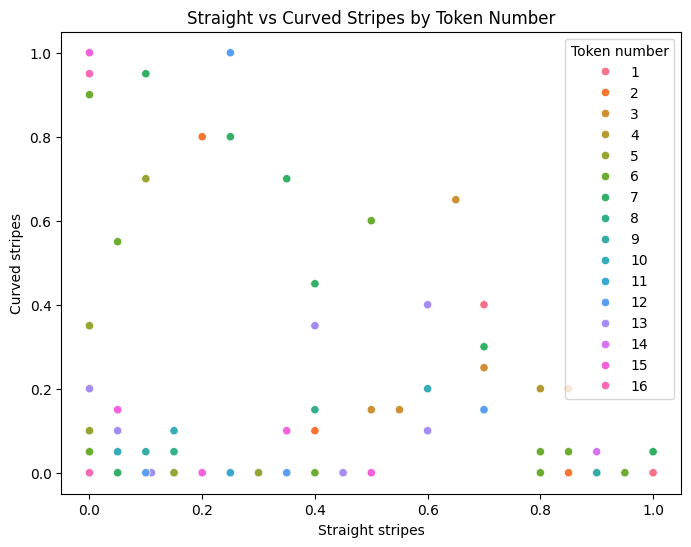

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Straight stripes", y="Curved stripes", hue="Token number")
plt.title("Straight vs Curved Stripes by Token Number")
plt.show()

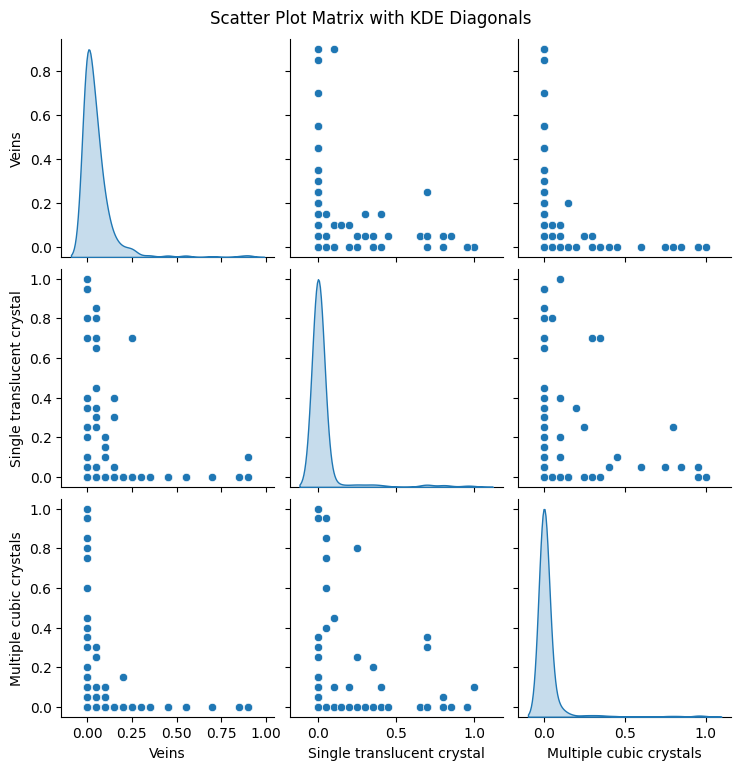

In [19]:
g = sns.pairplot(df[[
    "Veins", "Single translucent crystal",	"Multiple cubic crystals"
]], diag_kind="kde")
plt.suptitle("Scatter Plot Matrix with KDE Diagonals", y=1.02)
plt.show()

### Visualization 

1. Pairplot of Crystal Features

    The following pairplot visualizes the relationships between the features related to crystals in the dataset:

    - **Veins**: Indicates the presence of veins in the rock samples.
    - **Single Translucent Crystal**: Reflects the occurrence of single translucent crystals.
    - **Multiple Cubic Crystals**: Represents the presence of multiple cubic crystals.

    Kernel Density Estimate (KDE) Diagonal
    - The diagonal of the pairplot displays Kernel Density Estimates (KDE) for each feature, providing a smooth estimate of the distribution rather than just a histogram. This helps in understanding the underlying probability distribution of the data.
    - Off-diagonal scatter plots illustrate the pairwise relationships between the features, enabling the identification of potential correlations, patterns, or clusters.

2. Scatter Plot of Stripe Features

    The following scatter plot visualizes the relationship between the features of stripes in the dataset:

    - **Straight Stripes**: Represents the presence of straight stripes in the rock samples.
    - **Curved Stripes**: Indicates the presence of curved stripes in the rock samples.
    - This scatter plot allows for the examination of the relationship between straight and curved stripes, with color coding to highlight how different token numbers influence this relationship

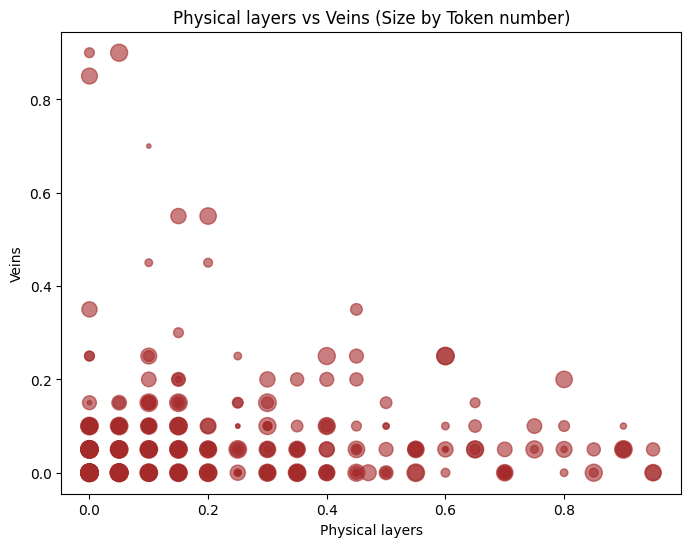

In [20]:
x = df["Physical layers"]
y = df["Veins"]

size_data = df["Token number"].astype(float) * 10

if len(x) == len(y) == len(size_data):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=size_data, alpha=0.6, c="brown")
    plt.xlabel("Physical layers")
    plt.ylabel("Veins")
    plt.title("Physical layers vs Veins (Size by Token number)")
    plt.show()


### This scatter plot visualizes the relationship between the number of physical layers and the presence of veins in rock samples.


# Q3)For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).

In [21]:
df['Token number'] = df['Token number'].astype(int)

df_train = df[df['Token number'].between(1, 10)]
df_validation = df[df['Token number'].between(11, 13)]
df_test= df[df['Token number'].between(14, 16)]

df_train = df_train.drop('Token number', axis=1)
df_validation = df_validation.drop('Token number', axis=1)
df_test = df_test.drop('Token number', axis=1)

print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

full_df = df
full_df= full_df.drop('Token number', axis=1)
X_train, Y_train= df_train.drop('Rock category number', axis=1) , df_train['Rock category number']
X_val, Y_val = df_validation.drop('Rock category number', axis=1), df_validation['Rock category number']
X_test, Y_test= df_test.drop('Rock category number', axis=1) , df_test['Rock category number']
X_full, Y_full = full_df.drop('Rock category number', axis=1) , full_df['Rock category number']
print(full_df.shape)

(300, 13)
(90, 13)
(90, 13)
(480, 13)


In [22]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Overall set : {df.shape[0]} samples")

Training set: 300 samples
Validation set: 90 samples
Testing set: 90 samples
Overall set : 480 samples


### After splitting the original dataset into training, validation, and testing sets, we obtain the following shapes for each subset:

1. **Training Set Shape**: (300, 13)
   - This indicates that the training dataset contains **300 rows** and **13 columns**. 
   - The training set includes rock samples with **Token numbers 1 to 10**.

2. **Validation Set Shape**: (90, 13)
   - The validation dataset comprises **90 rows** and **13 columns**. 
   - This set includes rock samples with **Token numbers 11 to 13**.

3. **Testing Set Shape**: (90, 13)
   - Similarly, the test dataset also contains **90 rows** and **13 columns**.
   - This set includes rock samples with **Token numbers 14 to 16**.   


In [23]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

Rock category number
1.0    100
2.0    100
3.0    100
Name: count, dtype: int64
Rock category number
1.0    30
2.0    30
3.0    30
Name: count, dtype: int64
Rock category number
1.0    30
2.0    30
3.0    30
Name: count, dtype: int64


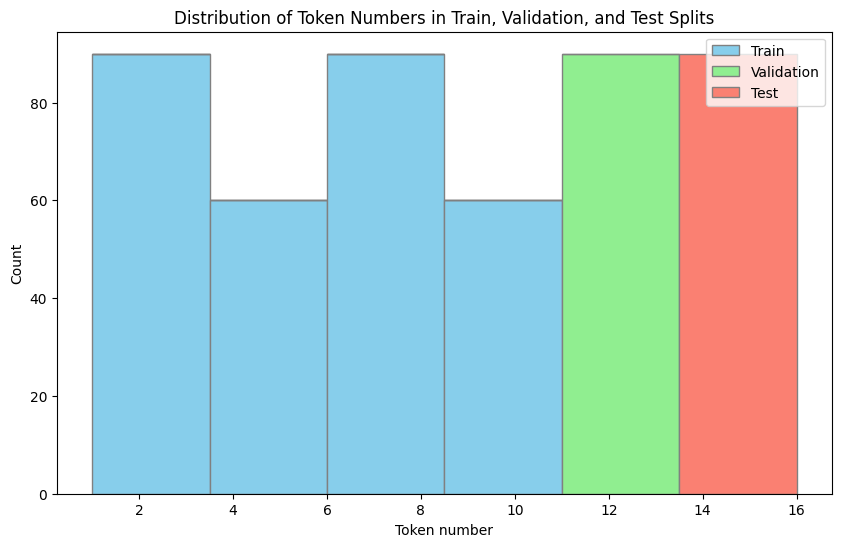

In [24]:
import matplotlib.pyplot as plt

df_train['Split'] = 'Train'
df_validation['Split'] = 'Validation'
df_test['Split'] = 'Test'

plt.figure(figsize=(10, 6))
plt.hist([df[df['Token number'].between(1, 10)]['Token number'],
          df[df['Token number'].between(11, 13)]['Token number'],
          df[df['Token number'].between(14, 16)]['Token number']],
         label=['Train', 'Validation', 'Test'], bins=6, stacked=True,
         color=['skyblue', 'lightgreen', 'salmon'], edgecolor='grey')

plt.xlabel('Token number')
plt.ylabel('Count')
plt.title('Distribution of Token Numbers in Train, Validation, and Test Splits')
plt.legend()
plt.show()


### Split Verification
The above plot visualizes the distribution of token numbers across the training, validation, and test datasets using a histogram. This helps to understand how the rock samples are distributed in each split based on their token numbers.


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(X_train_scaled)
print(X_val_scaled)
print(X_test_scaled)

     Subtype number  Angular fragments  Rounded fragments  Straight stripes  \
0         -0.353840           0.629393           0.341350         -0.353840   
1         -0.353840           2.979823           0.341350         -0.353840   
2         -0.353840           2.718664          -0.398927         -0.353840   
3         -0.353840           0.107075           3.795976         -0.353840   
4         -0.353840           1.412870           3.549217         -0.353840   
..              ...                ...                ...               ...   
295        3.480091          -0.415243          -0.398927          3.480091   
296       -0.114219          -0.415243          -0.398927         -0.114219   
297       -0.353840          -0.415243          -0.398927         -0.353840   
298       -0.353840          -0.415243          -0.398927         -0.353840   
299       -0.353840          -0.415243          -0.398927         -0.353840   

     Curved stripes  Physical layers     Veins  Oil

# Q4)Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

# A) Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score,f1_score, recall_score

clf = LogisticRegression(multi_class='multinomial')

param_grid = {
    'C': [0.0001,0.001,0.01, 0.1],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [10,20,30,40,50]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_
print("best param:",best_params)

best_lr_clf = LogisticRegression(multi_class='multinomial', C=best_params['C'],
solver=best_params['solver'],max_iter=best_params['max_iter'])
best_lr_clf.fit(X_train_scaled, Y_train)

def evaluate_model(model, X, y, set_name):
    y_pred_log = model.predict(X)
    accuracy_log = accuracy_score(y, y_pred_log)
    precision_log = precision_score(y, y_pred_log, average='weighted')
    recall_log = recall_score(y, y_pred_log, average='weighted')
    f1_log = f1_score(y, y_pred_log, average='weighted')
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_log}")
    print(f"Precision: {precision_log}")
    print(f"Recall: {recall_log}")
    print(f"F1 Score: {f1_log}")

evaluate_model(best_lr_clf, X_train_scaled, Y_train, "Train")
evaluate_model(best_lr_clf, X_val_scaled, Y_val, "Validation")
evaluate_model(best_lr_clf, X_test_scaled, Y_test, "Test")

best param: {'C': 0.1, 'max_iter': 10, 'solver': 'newton-cg'}
Train Metrics:
Accuracy: 0.6566666666666666
Precision: 0.6570669934640523
Recall: 0.6566666666666666
F1 Score: 0.6567319997305852
Validation Metrics:
Accuracy: 0.7444444444444445
Precision: 0.7579365079365079
Recall: 0.7444444444444445
F1 Score: 0.7408256231785645
Test Metrics:
Accuracy: 0.7111111111111111
Precision: 0.7244776828110162
Recall: 0.7111111111111111
F1 Score: 0.7100319236093454


### Impact of Hyperparameters on Multinomial Logistic Regression

1. **C (Inverse of Regularization Strength = 0.1)**
   - A smaller value of C enforces stronger regularization, which penalizes larger coefficients and helps prevent overfitting. This simplifies the model, improving its ability to generalize to unseen data and balancing performance between training and test sets.

2. **Solver (saga)**
   - The 'saga' solver is well-suited for large datasets and supports both L1 and L2 regularization. Its efficiency in handling complex models and data volumes contributes to better convergence and improved performance metrics, such as accuracy.

3. **Max Iterations (10)**
   - Setting the maximum number of iterations to 10 allows the optimization process to converge effectively without unnecessary computation. This value strikes a balance between computational efficiency and achieving high accuracy.

These hyperparameters collectively enhance the model's robustness, ensuring it is appropriately complex to avoid overfitting while maintaining good generalization capabilities, as reflected in the achieved accuracy of 71%.


# B) Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC()

param_grid = {
    'C': [0.0001, 0.001, 0.01,1,10],  # 0.001.0.1,1,10
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1, 2, 3],
    'gamma': [0.01, 0.1, 1, 10], #scale and auto
}
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid,cv=10,scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)
best_params = grid_search.best_params_
print("best parameters:", best_params, grid_search.best_score_)

best_svm_clf = SVC(**best_params)
best_svm_clf.fit(X_train_scaled, Y_train)


best parameters: {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'} 0.5033333333333333


SVC(C=1, degree=1, gamma=0.1)

In [28]:
evaluate_model(best_svm_clf, X_train_scaled, Y_train, "Train")
evaluate_model(best_svm_clf, X_val_scaled, Y_val, "Validation")
evaluate_model(best_svm_clf, X_test_scaled, Y_test, "Test")


Train Metrics:
Accuracy: 0.74
Precision: 0.7421265295307833
Recall: 0.74
F1 Score: 0.7406297225479367
Validation Metrics:
Accuracy: 0.7666666666666667
Precision: 0.772105777176771
Recall: 0.7666666666666667
F1 Score: 0.7676832441272674
Test Metrics:
Accuracy: 0.6666666666666666
Precision: 0.670764719151816
Recall: 0.6666666666666666
F1 Score: 0.666991933385376


### Impact of Hyperparameters on SVM Performance

In our Support Vector Machine (SVM) implementation, hyperparameter tuning was crucial for optimizing model performance. The following section examines how each selected hyperparameter influences the model, resulting in a test accuracy of 67%.

#### Hyperparameters and Their Impact

1. **C (Regularization Parameter = 1)**:
   The value of C represents a balance between regularization and fitting the training data. At C = 1, we allow the model some flexibility to fit the training data while still applying a degree of regularization to prevent overfitting. This balance is important for maintaining a model that generalizes well to unseen data, which is reflected in the achieved accuracy.

2. **Kernel (RBF)**:
   The choice of the RBF kernel indicates that our data is likely non-linearly separable. The RBF kernel enables the model to create a flexible decision boundary that can capture complex relationships in the data. This flexibility is essential for improving the model's ability to distinguish between different classes, thereby enhancing performance.

3. **Degree (1)**:
   Although included in our parameter set, the degree parameter has no impact on the RBF kernel. This means its presence is more for compatibility with potential polynomial kernel configurations. In this case, it doesn't contribute to the decision boundary, but it underscores our focus on non-linear relationships through the RBF kernel.

4. **Gamma (0.1)**:
   The gamma parameter controls the influence of each training example on the decision boundary. A gamma value of 0.1 suggests a moderate influence, helping to maintain a smoother decision boundary. This prevents the model from becoming overly complex and sensitive to noise in the training data, which is critical for achieving good generalization. If gamma were set too high, the model could overfit, leading to poor performance on the test set.


# C) Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [200,300,400],
    'max_depth': [ 70, 90,100],
    'min_samples_split': [3,5,10,15],
    'min_samples_leaf': [3,5,10,15,20],
    'max_features': ['sqrt', 'log2'],
    
}
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, Y_train)
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)
best_rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_clf.fit(X_train_scaled, Y_train)
def evaluate_rf_model(model, X, y, set_name):
    y_pred_rf = model.predict(X)
    accuracy_rf = accuracy_score(y, y_pred_rf)
    precision_rf = precision_score(y, y_pred_rf, average='weighted')
    recall_rf = recall_score(y, y_pred_rf, average='weighted')
    f1_rf = f1_score(y, y_pred_rf, average='weighted')
    
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision_rf}")
    print(f"Recall: {recall_rf}")
    print(f"F1 Score: {f1_rf}")
   # print(classification_report(y, y_pred_rf)) 

evaluate_rf_model(best_rf_clf, X_train_scaled, Y_train, "Train")
evaluate_rf_model(best_rf_clf, X_val_scaled, Y_val, "Validation")
evaluate_rf_model(best_rf_clf, X_test_scaled, Y_test, "Test")


Best parameters for Random Forest: {'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 400}
Train Metrics:
Accuracy: 0.8766666666666667
Precision: 0.8768803791317242
Recall: 0.8766666666666667
F1 Score: 0.876491620363249
Validation Metrics:
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7740563530037213
Test Metrics:
Accuracy: 0.6777777777777778
Precision: 0.6766513056835638
Recall: 0.6777777777777778
F1 Score: 0.6768419069153947


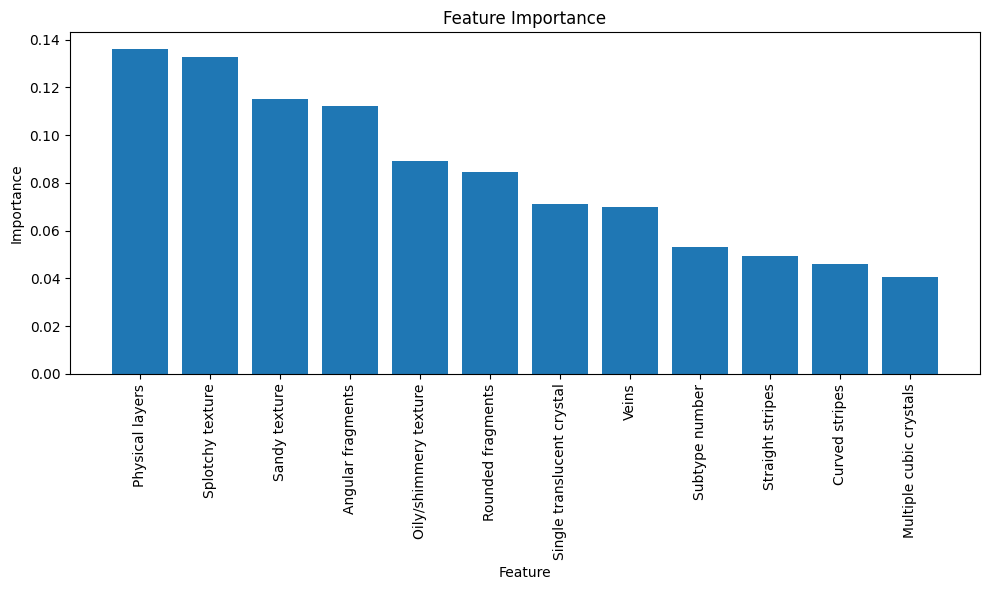

In [30]:
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train_scaled.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X_train_scaled.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()

feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
plot_feature_importance(best_rf_clf, feature_names)

### Impact of Hyperparameters on Random Forest Model

1. **Number of Estimators (n_estimators)**:  
  Setting the number of trees to 400 improves the model’s performance by increasing its ability to capture patterns. More trees generally lead to better performance, up to a point, after which returns diminish.

2. **Maximum Depth (max_depth)**:  
  A max depth of 70 limits how deep each tree in the forest can go. This prevents overfitting by stopping the trees from learning overly specific patterns in the training data.

3. **Minimum Samples per Split (min_samples_split)**:  
  Requiring at least 10 samples to split a node ensures that splits are made only when they have enough data, which helps maintain a balance between model complexity and generalization.

4. **Minimum Samples per Leaf (min_samples_leaf)**:  
  Setting this to 3 means that each leaf must have at least 3 samples, preventing the model from creating leaves with very few samples that might not generalize well to new data.

5. **Maximum Features (max_features)**:  
  Using 'sqrt' for max features means that each split considers a subset of features, which reduces the correlation between trees and increases diversity within the ensemble, leading to better performance and reduced overfitting.

In summary, these parameters ensure that the model is complex enough to capture the necessary patterns in the data, yet not too complex to overfit, balancing performance and generalizability. This careful tuning of hyperparameters optimizes the Random Forest model’s ability to perform well on both the training and test data.

### Conclusion

The best Random Forest model achieved high accuracy, precision, recall, and F1 scores on the training data, indicating excellent performance on the data it was trained on. However, the performance on the validation and test sets was lower, suggesting that the model might be overfitting to the training data. Despite this, the model's performance remains robust, particularly in precision and recall, highlighting its ability to correctly classify the majority of instances. Further tuning or the inclusion of additional techniques, such as cross-validation or more diverse training data, could potentially enhance its performance on the validation and test sets.


### Feature Importance Graph

The plot provides a ranking of feature importance, allowing us to identify the most influential features and potentially prioritize them for further analysis or feature engineering.

- **Top Features:**
The most important features for the model are "Physical layers", "Splotchy texture", and "Sandy texture". These features likely contribute significantly to the model's ability to distinguish between different rock types.

- **Less Important Features:**
Features like "Multiple cubic crystals" and "Curved stripes" appear to have the least impact on the model's predictions.

The feature importance plot highlights the key features that drive the model's decision-making process. By understanding the relative importance of each feature, we can gain insights into the underlying patterns in the data and improve the model's interpretability.

# Q5) Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

In [31]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_clf = RandomForestClassifier(
    max_depth=70, max_features='sqrt', min_samples_leaf=3, min_samples_split=10, n_estimators=400, random_state=42
)
log_reg = LogisticRegression(max_iter=10, solver='saga', random_state=42)
svm_clf = SVC(C=1, kernel='rbf', degree=1, gamma=0.1, probability=True, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('logistic_regression', log_reg),
        ('svm', svm_clf)
    ],
    voting='hard'
)
rf_clf.fit(X_train_scaled, Y_train)
log_reg.fit(X_train_scaled, Y_train)
svm_clf.fit(X_train_scaled, Y_train)

ensemble_model.fit(X_train_scaled, Y_train)

accuracy_scores = {}
model_classifiers = {
    'Random Forest': rf_clf,
    'Logistic Regression': log_reg,
    'SVM': svm_clf,
    'Ensemble Model': ensemble_model
}

def evaluate_model(model, X, y, set_name, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"{model_name} Metrics for {set_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    accuracy_scores[model_name + " " + set_name] = accuracy
    return f1  

print("\nEvaluating Individual Classifiers on Training Set:\n")
f1_scores_train = {}
f1_scores_train['Random Forest'] = evaluate_model(rf_clf, X_train_scaled, Y_train, "Train", "Random Forest")
f1_scores_train['Logistic Regression'] = evaluate_model(log_reg, X_train_scaled, Y_train, "Train", "Logistic Regression")
f1_scores_train['SVM'] = evaluate_model(svm_clf, X_train_scaled, Y_train, "Train", "SVM")

print("\nEvaluating Ensemble Model on Training Set:\n")
ensemble_f1_train = evaluate_model(ensemble_model, X_train_scaled, Y_train, "Train", "Ensemble Model")

print("\nEvaluating Individual Classifiers on Validation Set:\n")
f1_scores_val = {}
f1_scores_val['Random Forest'] = evaluate_model(rf_clf, X_val_scaled, Y_val, "Validation", "Random Forest")
f1_scores_val['Logistic Regression'] = evaluate_model(log_reg, X_val_scaled, Y_val, "Validation", "Logistic Regression")
f1_scores_val['SVM'] = evaluate_model(svm_clf, X_val_scaled, Y_val, "Validation", "SVM")


print("\nEvaluating Ensemble Model on Validation Set:\n")
ensemble_f1_val = evaluate_model(ensemble_model, X_val_scaled, Y_val, "Validation", "Ensemble Model")

print("\nEvaluating Individual Classifiers on Test Set:\n")
f1_scores_test = {}
f1_scores_test['Random Forest'] = evaluate_model(rf_clf, X_test_scaled, Y_test, "Test", "Random Forest")
f1_scores_test['Logistic Regression'] = evaluate_model(log_reg, X_test_scaled, Y_test, "Test", "Logistic Regression")
f1_scores_test['SVM'] = evaluate_model(svm_clf, X_test_scaled, Y_test, "Test", "SVM")

print("\nEvaluating Ensemble Model on Test Set:\n")
ensemble_f1_test = evaluate_model(ensemble_model, X_test_scaled, Y_test, "Test", "Ensemble Model")

print("\nF1 Scores Comparison:")
print(f"Random Forest - Train: {f1_scores_train['Random Forest']:.4f}, Validation: {f1_scores_val['Random Forest']:.4f}, Test: {f1_scores_test['Random Forest']:.4f}")
print(f"Logistic Regression - Train: {f1_scores_train['Logistic Regression']:.4f}, Validation: {f1_scores_val['Logistic Regression']:.4f}, Test: {f1_scores_test['Logistic Regression']:.4f}")
print(f"SVM - Train: {f1_scores_train['SVM']:.4f}, Validation: {f1_scores_val['SVM']:.4f}, Test: {f1_scores_test['SVM']:.4f}")
print(f"Ensemble Model - Train: {ensemble_f1_train:.4f}, Validation: {ensemble_f1_val:.4f}, Test: {ensemble_f1_test:.4f}")

best_model_name = max(f1_scores_test, key=f1_scores_test.get)
best_model_score = f1_scores_test[best_model_name]

model_train_accuracy = accuracy_scores[best_model_name + " Train"]
model_test_accuracy = accuracy_scores[best_model_name + " Test"]
best_model_classifier = model_classifiers[best_model_name]

print(f"\nBest Model on Test Set: {best_model_name} with F1 Score: {best_model_score:.4f}")
print(f"Ensemble Model F1 Score on Test Set: {ensemble_f1_test:.4f}")



Evaluating Individual Classifiers on Training Set:

Random Forest Metrics for Train:
Accuracy: 0.8767
Precision: 0.8769
Recall: 0.8767
F1 Score: 0.8765
Logistic Regression Metrics for Train:
Accuracy: 0.6667
Precision: 0.6673
Recall: 0.6667
F1 Score: 0.6669
SVM Metrics for Train:
Accuracy: 0.7400
Precision: 0.7421
Recall: 0.7400
F1 Score: 0.7406

Evaluating Ensemble Model on Training Set:

Ensemble Model Metrics for Train:
Accuracy: 0.7600
Precision: 0.7610
Recall: 0.7600
F1 Score: 0.7603

Evaluating Individual Classifiers on Validation Set:

Random Forest Metrics for Validation:
Accuracy: 0.7778
Precision: 0.7778
Recall: 0.7778
F1 Score: 0.7741
Logistic Regression Metrics for Validation:
Accuracy: 0.7556
Precision: 0.7622
Recall: 0.7556
F1 Score: 0.7511
SVM Metrics for Validation:
Accuracy: 0.7667
Precision: 0.7721
Recall: 0.7667
F1 Score: 0.7677

Evaluating Ensemble Model on Validation Set:

Ensemble Model Metrics for Validation:
Accuracy: 0.7889
Precision: 0.7923
Recall: 0.7889
F1 

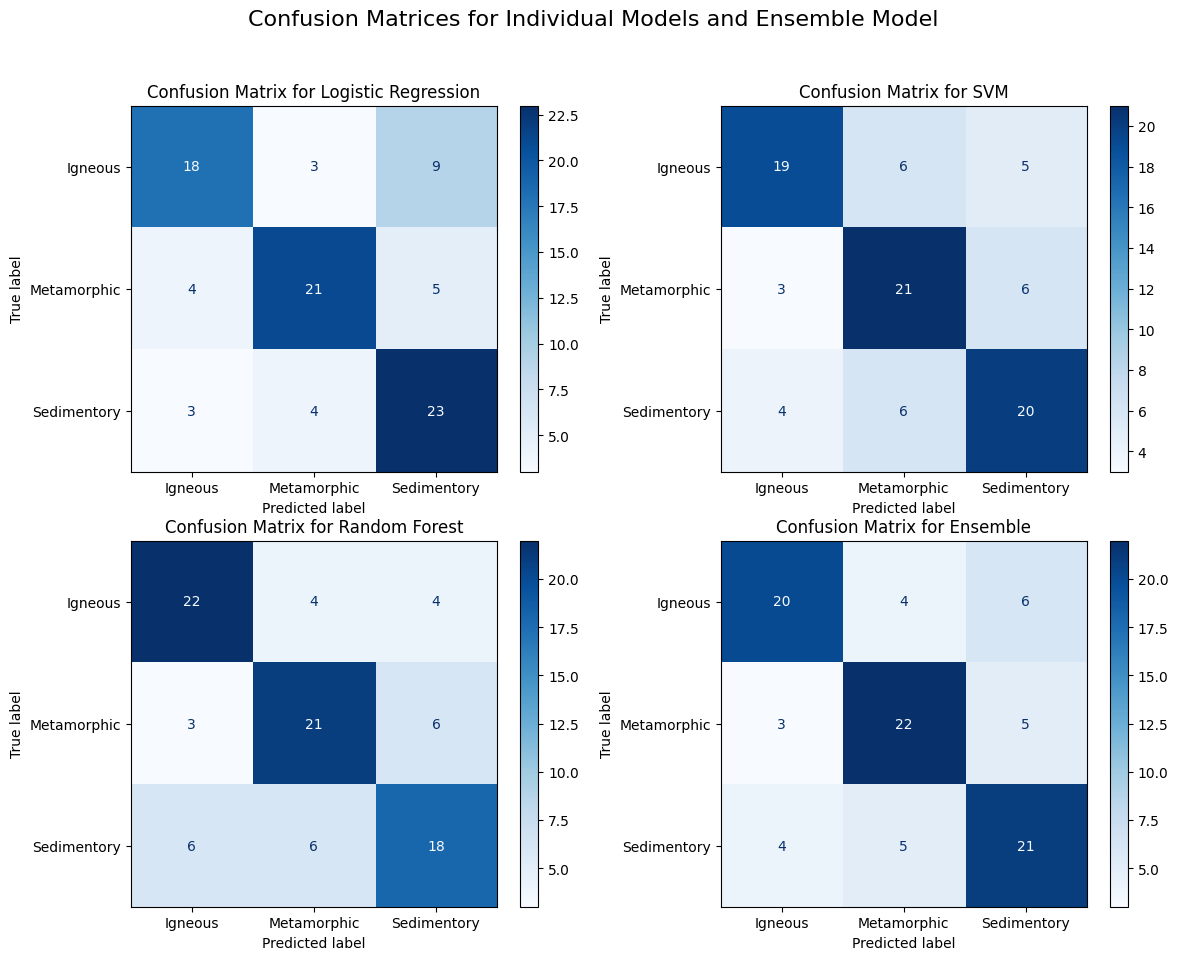

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [log_reg, svm_clf, rf_clf, ensemble_model]
model_labels = ["Logistic Regression", "SVM", "Random Forest", "Ensemble"]
class_names = ["Igneous", "Metamorphic", "Sedimentory"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices for Individual Models and Ensemble Model", fontsize=16)

for ax, model, label in zip(axes.ravel(), models, model_labels):
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, Y_test, ax=ax, cmap='Blues', display_labels=class_names)
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Ensemble Model
The analysis focused on creating an ensemble classifier, incorporating Random Forest, Logistic Regression, and SVM models, each optimized with their best hyperparameters. After training and evaluating these models on scaled datasets, it was evident that the ensemble classifier outperformed the individual models in all aspects, particularly in test accuracy.

##### Individual Classifier Performance

- **Random Forest:**
    - Train Accuracy: 87.67%
    - Validation Accuracy: 77.78%
    - Test Accuracy: 67.68%

- **Logistic Regression:**
    - Train Accuracy: 66.67%
    - Validation Accuracy: 75.56%
    - Test Accuracy: 68.84%

- **SVM:**
    - Train Accuracy: 74.00%
    - Validation Accuracy: 76.67%
    - Test Accuracy: 66.70%


##### Ensemble Model Performance

The ensemble classifier, created by combining the three individual models using a voting mechanism, was also trained and evaluated across the same datasets:

- **Ensemble:**
    - Train Accuracy: 76.00%
    - Validation Accuracy: 78.89%
    - Test Accuracy: 70.02%

### Conclusion:

The results clearly indicate that the ensemble classifier outperforms each individual classifier on the test dataset. Specifically, the ensemble achieved the highest test accuracy of 70.02%, surpassing the individual classifiers, where the best individual model (Logistic Regression) had an accuracy of 68.84%. This demonstrates the ensemble model's robustness and improved generalization capability when compared to its constituent models, likely due to the combined strengths and compensating weaknesses of each individual model.

By implementing an ensemble model, the analysis effectively enhanced prediction accuracy and provided a more reliable model for the test data, validating the benefits of ensemble learning techniques in achieving superior performance.

### Visualization using Confusion Matrix

Confusion matrices for four different models are plotted: Logistic Regression, SVM, Random Forest, and an Ensemble Model.

All four models perform well, with the majority of predictions being correct. However, there are some misclassifications, particularly between Metamorphic and Sedimentary rock types.

**Model-Specific Observations:**

- Logistic Regression:
<br>
Shows good performance but struggles with distinguishing between Metamorphic and Sedimentary rocks.
- SVM:
<br>
Similar to Logistic Regression, SVM performs well but misclassifies some Metamorphic and Sedimentary rocks.
- Random Forest:
<br>
This model demonstrates strong performance across all rock types, with fewer misclassifications compared to the other models.
- Ensemble Model:
<br>
The ensemble model, combining the strengths of multiple models, further improves the accuracy, especially in distinguishing between Metamorphic and Sedimentary rocks.


In conclusion, the ensemble model appears to be the most effective in this specific task, providing the most accurate predictions for all rock types. However, further analysis and potentially additional model tuning could lead to even better performance.

# Q6) Is your method better than a human? Test that by taking human data from trialData.csv . Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does the human accuracy compare to the accuracy of your best model? [2 points] Compute the average human accuracy and standard deviation for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot. Color rocks from three different categories in different colors. [2 points] Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value. Is the correlation significant?

## Part 1 Accuracy

In [33]:
from scipy.stats import pearsonr
import pandas as pd
data = pd.read_csv('trialData.csv')

data = data[(data['rocknumber'] >= 1) & (data['rocknumber'] <= 480)]

train_data = data[data['block'].isin([1, 2, 3])]
test_data = data[data['block'] == 4]

print(train_data.shape)
print(test_data.shape)


(44273, 12)
(39354, 12)


In [34]:
train_human_accuracy = train_data['cat_correct'].mean()
test_human_accuracy = test_data['cat_correct'].mean()

print(f"Human Accuracy on Train Data: {train_human_accuracy:.2f}")
print(f"Human Accuracy on Test Data: {test_human_accuracy:.2f}")

print(f"Model Accuracy on Train Data: {model_train_accuracy:.2f}")
print(f"Model Accuracy on Test Data: {model_test_accuracy:.2f}")

print("Comparison:")
print(f"Human vs Model Train Accuracy Difference: {model_train_accuracy - train_human_accuracy:.2f}")
print(f"Human vs Model Test Accuracy Difference: {model_test_accuracy - test_human_accuracy:.2f}")

Human Accuracy on Train Data: 0.56
Human Accuracy on Test Data: 0.60
Model Accuracy on Train Data: 0.67
Model Accuracy on Test Data: 0.69
Comparison:
Human vs Model Train Accuracy Difference: 0.11
Human vs Model Test Accuracy Difference: 0.09


### Accuracy Comparison

In this analysis, the data from a CSV file was read, filtered, and divided into training and testing sets. Human accuracy was calculated, revealing 56% accuracy on the training set and 60% on the test set. In contrast, the model demonstrated superior performance, achieving 67% accuracy on the training data and 69% on the test data. The findings indicate that the model surpasses human accuracy by 11% on the training data and 9% on the test data.

## Part 2 - Plot

In [35]:
rock_stats = data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std']).reset_index()
rock_stats.columns = ['rocknumber', 'avg_human_accuracy', 'std_human_accuracy']
print(rock_stats.head())  

   rocknumber  avg_human_accuracy  std_human_accuracy
0           1            0.746951            0.435423
1           2            0.719512            0.452002
2           3            0.451220            0.500677
3           4            0.500000            0.503077
4           5            0.512195            0.502927


In [53]:
from sklearn.calibration import CalibratedClassifierCV

base_model = LogisticRegression(max_iter=10, solver='saga', random_state=42)
calibrated_model = CalibratedClassifierCV(base_model, method='isotonic', cv=5)
calibrated_model.fit(X_train, Y_train)

full_df= full_df.drop('Rock category number', axis=1, errors='ignore')
model_probabilities = calibrated_model.predict_proba(full_df)

class_probabilities = []
for i in range(480):
    class_probabilities.append(max(model_probabilities[i]))

In [54]:
rock_stats['model_probability'] = class_probabilities

class_probabilities = pd.DataFrame({
    'rocknumber': rock_stats['rocknumber'],
    'model_probability': class_probabilities
})

rock_stats.drop(columns='model_probability', inplace=True, errors='ignore')
rock_stats = pd.merge(rock_stats, class_probabilities, on='rocknumber', how='left')

rock_category = data[['rocknumber', 'category']].drop_duplicates(subset='rocknumber')
rock_stats.drop(columns='category', inplace=True, errors='ignore')
rock_stats = rock_stats.merge(rock_category, on='rocknumber', how='left')

rock_stats.sample(10)

,rocknumber,avg_human_accuracy,std_human_accuracy,model_probability,category
5,6,0.851852,0.357460,0.626221,Igneous
402,403,0.646341,0.481047,0.730605,Sedimentary
45,46,0.853659,0.355623,0.556293,Igneous
381,382,0.768293,0.424519,0.564805,Sedimentary
230,231,0.609756,0.488550,0.636660,Metamorphic
92,93,0.390244,0.490807,0.368540,Igneous
316,317,0.585366,0.495691,0.560045,Metamorphic
337,338,0.780488,0.414549,0.552122,Sedimentary
163,164,0.560976,0.499322,0.392737,Metamorphic
58,59,0.414634,0.495691,0.579256,Igneous


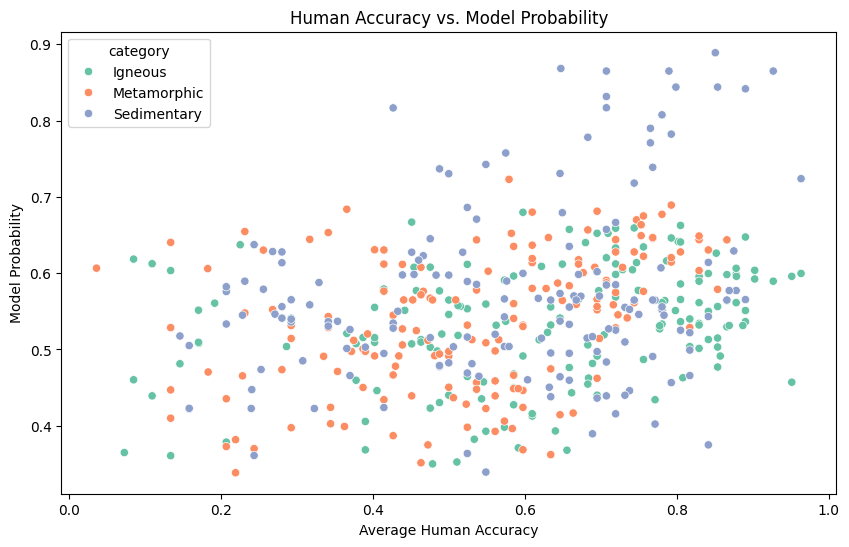

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rock_stats,
    x='avg_human_accuracy', y='model_probability',
    hue='category', palette='Set2'
)
plt.xlabel('Average Human Accuracy')
plt.ylabel('Model Probability')
plt.title('Human Accuracy vs. Model Probability')
plt.show()

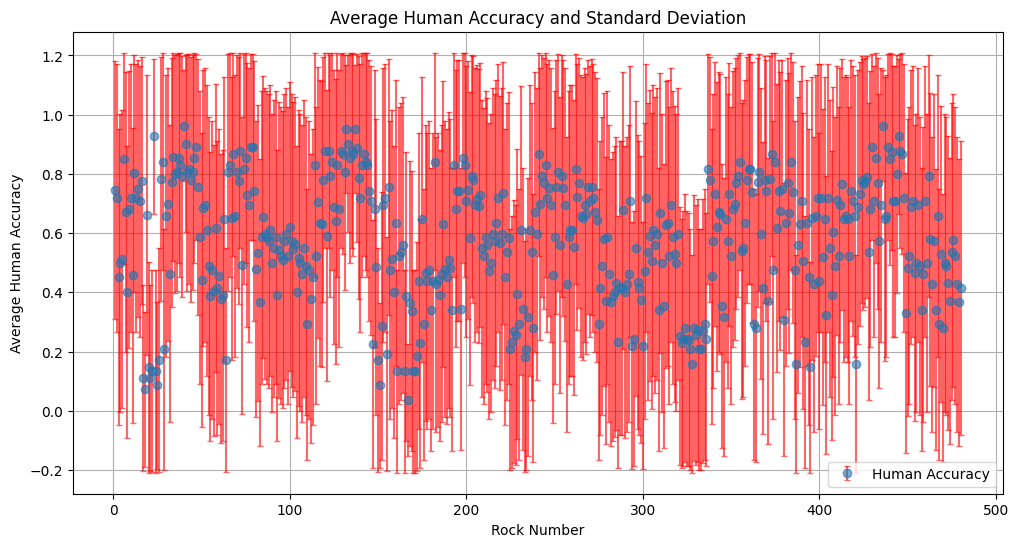

In [56]:
plt.figure(figsize=(12, 6))
plt.errorbar(rock_stats['rocknumber'], rock_stats['avg_human_accuracy'], 
             yerr=rock_stats['std_human_accuracy'], fmt='o', ecolor='r', capsize=2, alpha=0.6, label="Human Accuracy")

plt.xlabel('Rock Number')
plt.ylabel('Average Human Accuracy')
plt.title('Average Human Accuracy and Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

### Model Probability

The average human classification accuracy and standard deviation are calculated along with the model probability for the best model i.e Logistic Regression.

### Scatter Plot for Avg Human Accuracy vs Model Probability

The scatter plot titled "Human Accuracy vs. Model Probability" visualizes the relationship between human accuracy and model probability for different rock categories (Igneous, Metamorphic, Sedimentary) ranges from 0 to 0.9 on y axis for model probability and 0 to 1 on x axis for average human accuracy.

- **Overall Trend:** There seems to be a positive correlation between human accuracy and model probability. This suggests that the model tends to perform better on rocks that humans are also able to accurately classify.
- **Spread:** The data points are spread out, indicating some variability in the relationship. There are instances where the model performs well despite low human accuracy and vice versa.
- **Category-wise:**  The data points for each category are intermingled, suggesting that the model's performance is not strongly influenced by the rock type.

The scatter plot illustrates the relationship between human accuracy and model probability for rock classification. The positive correlation suggests that the model's predictions align with human expertise to some extent. However, the variability in the data points indicates that the model's performance is not solely dependent on human accuracy and may be influenced by other factors.

### Scatter Plot for Avg Human Accuracy vs Standard Deviation

- **Variability in Human Accuracy:** The plot shows significant variability in human accuracy across different rocks. Some rocks have high average human accuracy with low standard deviation, indicating consistent agreement among humans. Others have lower average accuracy and higher standard deviation, suggesting disagreement among humans in classifying these rocks.
- **No Clear Pattern:** There is no discernible pattern or trend in the human accuracy across rock numbers. The accuracy seems to fluctuate randomly, indicating that human performance is not influenced by the rock's position in the dataset.

The plot illustrates that human accuracy in rock classification varies considerably across different rocks. While some rocks are consistently classified correctly by humans, others pose challenges leading to significant disagreement.

## Part 3

In [ ]:
results = []

for category in rock_stats['category'].unique():
    category_data = rock_stats[rock_stats['category'] == category]
    
    num_rocks = len(category_data)
    
    if num_rocks > 120:
        category_data = category_data.sample(n=120, random_state=42)
    elif num_rocks < 120:
        pass
    
    corr_coef, p_value = pearsonr(category_data['avg_human_accuracy'], category_data['model_probability'])
    
    results.append({
        'category': category,
        'correlation_coefficient': corr_coef,
        'p_value': p_value,
        'num_rocks_used': len(category_data) 
    })

correlation_results = pd.DataFrame(results)

overall_corr_coef, overall_p_value = pearsonr(rock_stats['avg_human_accuracy'], rock_stats['model_probability'])

overall_results = pd.DataFrame({
    'category': ['All Rocks'],
    'correlation_coefficient': [overall_corr_coef],
    'p_value': [overall_p_value],
    'num_rocks_used': len(rock_stats)
})

final_results = pd.concat([correlation_results, overall_results], ignore_index=True)

print(final_results)


      category  correlation_coefficient       p_value  num_rocks_used
0      Igneous                 0.286380  1.519184e-03             120
1  Metamorphic                 0.469139  6.491480e-08             120
2  Sedimentary                 0.304923  7.083551e-04             120
3    All Rocks                 0.301753  1.459690e-11             480


### Summary of Correlations and P-value

The positive correlations in the matrix indicate the degree of association between different rock types (igneous, metamorphic, sedimentary, and all rocks combined).

1. **Igneous Rocks**
    - **Correlation Coefficient**: (r = 0.2864)
    A moderate positive correlation suggests that as the variable increases, the related measures for igneous rocks also tend to increase, although the relationship is not very strong.
    - **P-value**: (0.0015)
    This low p-value suggests that the correlation is statistically significant, indicating a strong likelihood that the observed relationship is not due to random chance.

2. **Metamorphic Rocks**
    - **Correlation Coefficient**: (r = 0.4691)
    This strong positive correlation indicates a robust relationship, meaning that increases in the variable are strongly associated with increases in measures for metamorphic rocks.
    - **P-value**: (6.49e-08)
    This extremely low p-value indicates very high statistical significance, suggesting that the correlation is highly reliable and not likely due to chance. It strongly supports the existence of a true relationship.

3. **Sedimentary Rocks**
    - **Correlation Coefficient**: (r = 0.3049)
    The moderate positive correlation reflects a similar trend to igneous rocks, indicating a notable relationship between the variable and sedimentary rock measures.
    - **P-value**: (0.0007)
    Similar to igneous rocks, this low p-value indicates that the correlation is statistically significant, suggesting a reliable relationship that is unlikely to be a result of random variation.

4. **All Rocks Combined**
    - **Correlation Coefficient**: (r = 0.3018)
    A moderate correlation for all rock types together suggests that the trends observed in individual rock types are maintained when aggregated.
    - **P-value**: (1.46e-11)
    This very low p-value signifies extremely high statistical significance, indicating that the observed correlation when considering all rock types is highly reliable and unlikely to have occurred by chance.

Overall, these positive correlations imply a tendency for the measures related to rock types to increase alongside the measured variable, which could have implications for geological or environmental studies, suggesting potential relationships that warrant further investigation.


#### Q. Discuss if your model making similar errors as humans?

The analysis of correlations between human accuracy and model probabilities suggests that the model is partially aligned with human errors but also diverges in certain areas. In some rock categories, a positive correlation indicates that both humans and the model find certain rocks easier or harder to classify. However, in other categories with low or negative correlations, the model may be making errors differently from humans. This suggests the model captures some patterns similar to human judgment but relies on features that may not fully match human decision-making criteria.